### Algerian Forest Fire Data

The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attributes and 1 output attribute (class)
The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.

In [507]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [508]:
dataset = pd.read_csv("Algerian_forest_fires_dataset.csv")

In [509]:
dataset.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0   1     6  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1   2     6  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2   3     6  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3   4     6  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4   5     6  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire

In [510]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


### Data Cleaning

In [511]:
## missing values

dataset[dataset.isnull().any(axis=1)]

day month  year Temperature   RH   Ws Rain   \
122                            NaN   NaN   NaN         NaN  NaN  NaN   NaN   
123  Sidi-Bel Abbes Region Dataset   NaN   NaN         NaN  NaN  NaN   NaN   
168                             14     7  2012          37   37   18   0.2   

     FFMC   DMC      DC   ISI   BUI      FWI Classes    
122   NaN   NaN     NaN   NaN   NaN      NaN       NaN  
123   NaN   NaN     NaN   NaN   NaN      NaN       NaN  
168  88.9  12.9  14.6 9  12.5  10.4  fire          NaN

In [512]:
dataset.drop(122, inplace=True)
dataset.drop(123, inplace=True)
dataset.reset_index(drop=True, inplace=True)

In [513]:

dataset[dataset.isnull().any(axis=1)]

day month  year Temperature  RH  Ws Rain   FFMC   DMC      DC   ISI   BUI  \
166  14     7  2012          37  37  18   0.2  88.9  12.9  14.6 9  12.5  10.4   

         FWI Classes    
166  fire          NaN

In [514]:
dataset.loc[:122,  "Region"] = 0
dataset.loc[123 : ,  "Region"] = 1
df = dataset

In [515]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          245 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       245 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.8+ KB


In [516]:
df[['Region']] = df[['Region']].astype(int)

In [517]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          245 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       245 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.8+ KB


In [518]:
df.tail()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
240  26     9  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
241  27     9  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
242  28     9  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
243  29     9  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
244  30     9  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    Region  
240  6.5       fire          1  
241    0   not fire          1  
242  0.2   not fire          1  
243  0.7   not fire          1  
244  0.5  not fire           1

In [519]:
df[df.isnull().any(axis=1)]

day month  year Temperature  RH  Ws Rain   FFMC   DMC      DC   ISI   BUI  \
166  14     7  2012          37  37  18   0.2  88.9  12.9  14.6 9  12.5  10.4   

         FWI Classes    Region  
166  fire          NaN       1

In [520]:
df.dropna().reset_index(drop=True)

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0     1     6  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1     2     6  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2     3     6  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3     4     6  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4     5     6  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
239  26     9  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
240  27     9  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
241  28     9  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
242  29     9  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
243  30     9  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    Region  
0    0.5   not fire          0  
1    0.4   not fire          0  
2    0.1   not fire          0  
3      0   not fire          0  
4    0.5   not fire          0  
..   ...           ...     ...  
239  6.5       fire          1  
240    0   not fire          1  
241  0.2   not fire          1  
242  0.7   not fire          1  
243  0.5  not fire           1  

[244 rows x 15 columns]

In [521]:
df.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0   1     6  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1   2     6  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2   3     6  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3   4     6  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4   5     6  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    Region  
0  not fire          0  
1  not fire          0  
2  not fire          0  
3  not fire          0  
4  not fire          0

In [522]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [523]:
df.iloc[[122]]

day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC  DC  ISI  BUI  \
122  day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC  DC  ISI  BUI   

     FWI  Classes    Region  
122  FWI  Classes         0

In [524]:
df = df.drop(122).reset_index(drop=True)

In [525]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [526]:
## fix spaces in column name
df.columns = df.columns.str.strip()

In [527]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.7+ KB


In [529]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [530]:
df = df.drop(165).reset_index(drop=True)

In [531]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [532]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [533]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


### Changing the other columns to float datatype


In [534]:
objects = [features for features in df.columns if df[features].dtypes == 'O']

In [535]:
for i in objects :
    if i != 'Classes':
        df[i] = df[i].astype(float)

In [536]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [537]:
df.describe

<bound method NDFrame.describe of      day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
0      1      6  2012           29  57  18   0.0  65.7   3.4   7.6  1.3   3.4   
1      2      6  2012           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9   
2      3      6  2012           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7   
3      4      6  2012           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7   
4      5      6  2012           27  77  16   0.0  64.8   3.0  14.2  1.2   3.9   
..   ...    ...   ...          ...  ..  ..   ...   ...   ...   ...  ...   ...   
238   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
239   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
240   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
241   29      9  2012           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1   
242   30      9  2012           24  64  15   0.2  67.3   3.8  16.5  1.2   4

In [538]:
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv', index=False)

### Exploratory Data Analysis

In [539]:
df_copy = df.drop(columns=['day', 'month', 'year'], axis=1)

In [540]:
df_copy.head()

Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI      Classes  \
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5  not fire      
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4  not fire      
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1  not fire      
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0  not fire      
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5  not fire      

   Region  
0       0  
1       0  
2       0  
3       0  
4       0

In [541]:
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [542]:
df_copy['Classes'] = np.where( df_copy['Classes'].str.contains('not fire'), 0, 1)

In [543]:
df_copy.head()

Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  Classes  Region
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5        0       0
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4        0       0
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1        0       0
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0        0       0
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5        0       0

In [544]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [545]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 22.9 KB


In [546]:
df_copy['Classes'] = df_copy['Classes'].astype(int)

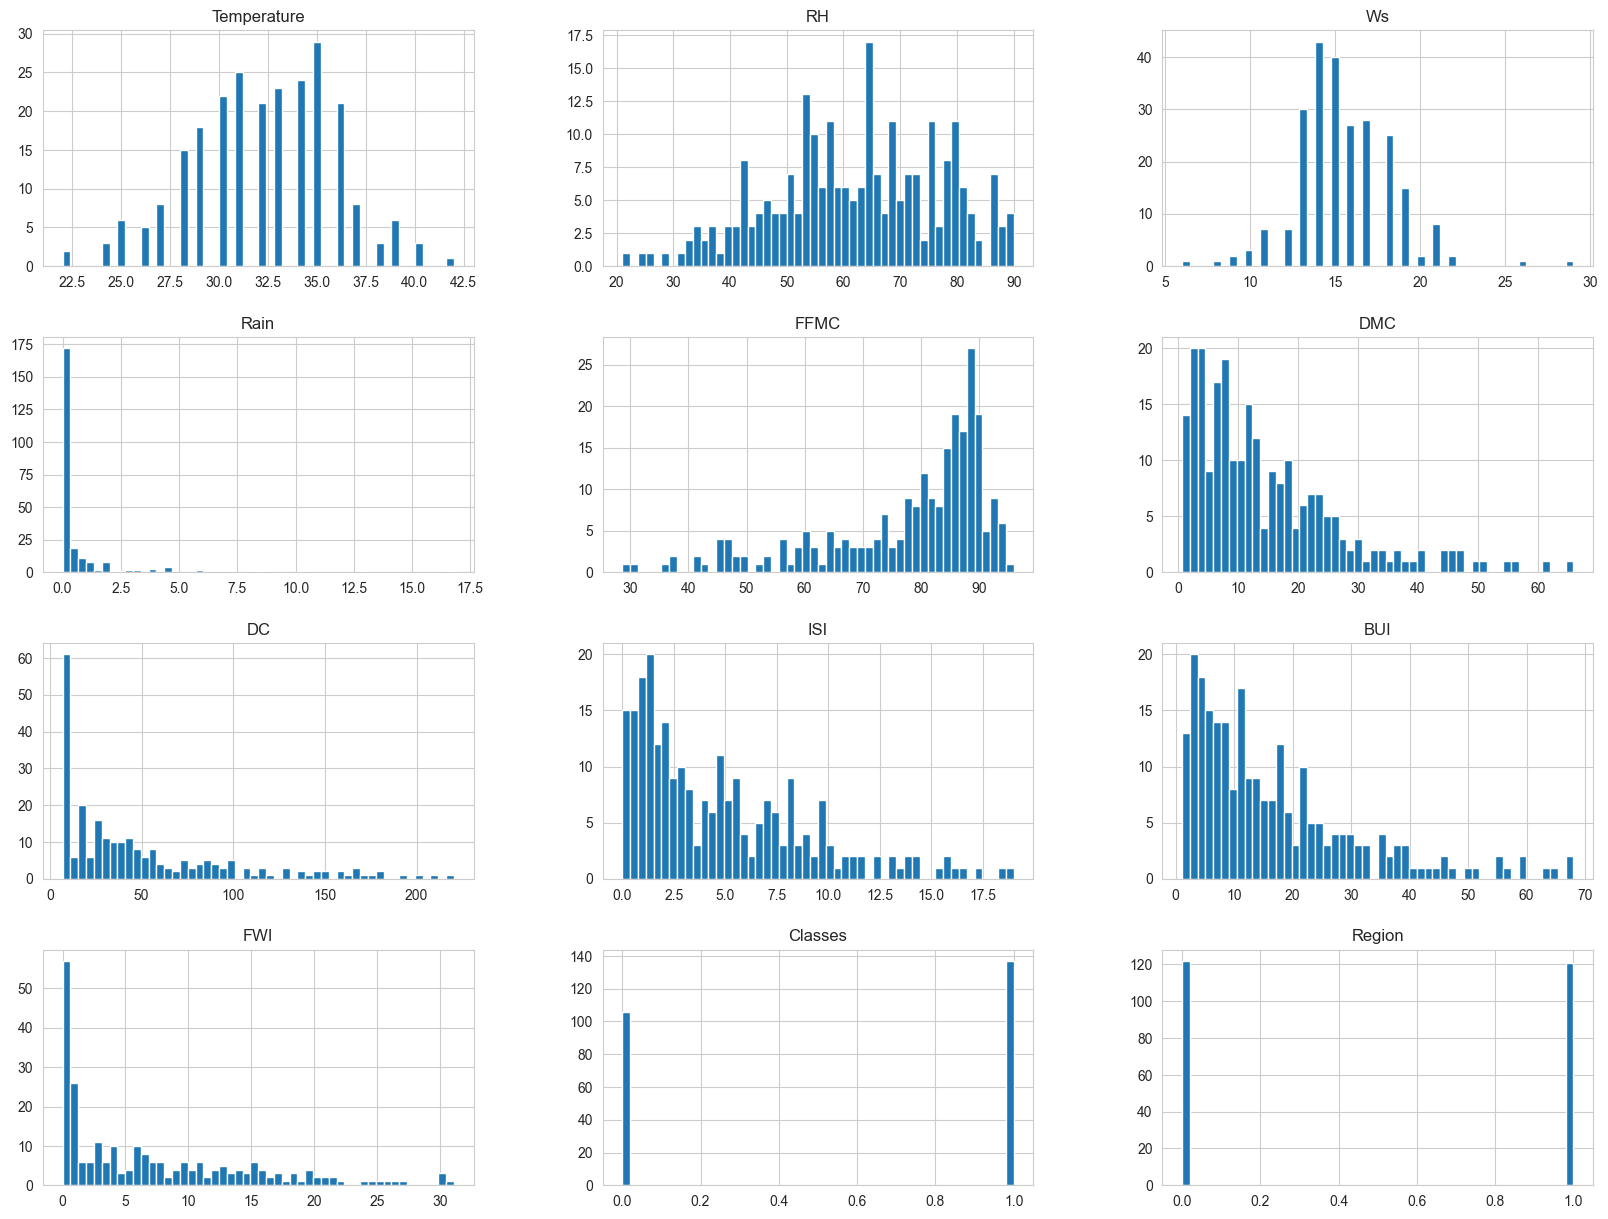

In [547]:
## Plot Density plot for all features
# plt.style.use('seaborn')
df_copy.hist(bins=50, figsize=(20, 15))
plt.show()

In [548]:
## Percentage for pie chart
percentage = df_copy['Classes'].value_counts(normalize=True)*100

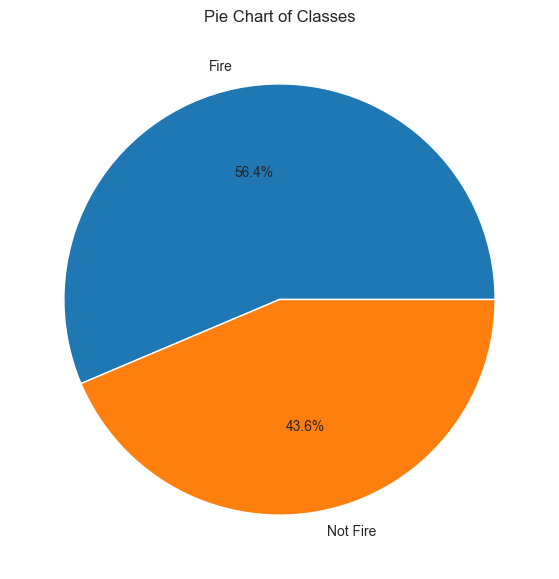

In [549]:
## plotting pie charts

classlabels = ["Fire", "Not Fire"]
plt.figure(figsize=(12, 7))
plt.pie(percentage, labels=classlabels, autopct="%1.1f%%")
plt.title("Pie Chart of Classes")
plt.show()

In [550]:
## Correlation 
df_copy.corr()

Temperature        RH        Ws      Rain      FFMC       DMC  \
Temperature     1.000000 -0.651400 -0.284510 -0.326492  0.676568  0.485687   
RH             -0.651400  1.000000  0.244048  0.222356 -0.644873 -0.408519   
Ws             -0.284510  0.244048  1.000000  0.171506 -0.166548 -0.000721   
Rain           -0.326492  0.222356  0.171506  1.000000 -0.543906 -0.288773   
FFMC            0.676568 -0.644873 -0.166548 -0.543906  1.000000  0.603608   
DMC             0.485687 -0.408519 -0.000721 -0.288773  0.603608  1.000000   
DC              0.376284 -0.226941  0.079135 -0.298023  0.507397  0.875925   
ISI             0.603871 -0.686667  0.008532 -0.347484  0.740007  0.680454   
BUI             0.459789 -0.353841  0.031438 -0.299852  0.592011  0.982248   
FWI             0.566670 -0.580957  0.032368 -0.324422  0.691132  0.875864   
Classes         0.516015 -0.432161 -0.069964 -0.379097  0.769492  0.585658   
Region          0.269555 -0.402682 -0.181160 -0.040013  0.222241  0.192089   

                   DC       ISI       BUI       FWI   Classes    Region  
Temperature  0.376284  0.603871  0.459789  0.566670  0.516015  0.269555  
RH          -0.226941 -0.686667 -0.353841 -0.580957 -0.432161 -0.402682  
Ws           0.079135  0.008532  0.031438  0.032368 -0.069964 -0.181160  
Rain        -0.298023 -0.347484 -0.299852 -0.324422 -0.379097 -0.040013  
FFMC         0.507397  0.740007  0.592011  0.691132  0.769492  0.222241  
DMC          0.875925  0.680454  0.982248  0.875864  0.585658  0.192089  
DC           1.000000  0.508643  0.941988  0.739521  0.511123 -0.078734  
ISI          0.508643  1.000000  0.644093  0.922895  0.735197  0.263197  
BUI          0.941988  0.644093  1.000000  0.857973  0.586639  0.089408  
FWI          0.739521  0.922895  0.857973  1.000000  0.719216  0.197102  
Classes      0.511123  0.735197  0.586639  0.719216  1.000000  0.162347  
Region      -0.078734  0.263197  0.089408  0.197102  0.162347  1.000000

<Axes: >

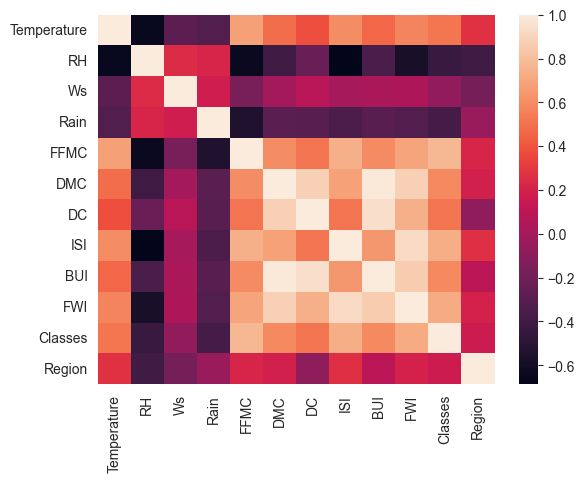

In [551]:
sns.heatmap(df_copy.corr())

<Axes: ylabel='FWI'>

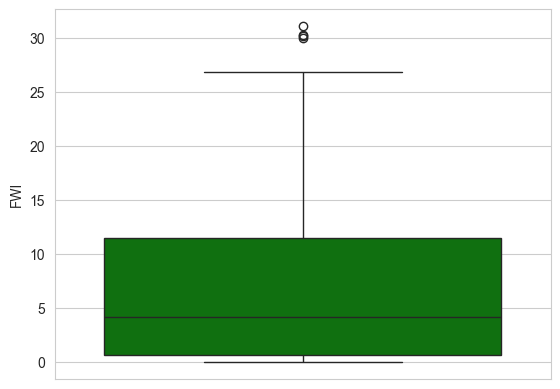

In [552]:
## Box plots
sns.boxplot(df['FWI'], color='g')

In [553]:
df['Classes'] = np.where( df['Classes'].str.contains('not fire'), 'not fire', 'fire')

Text(0.5, 1.0, 'Fire analysis of  SidiBel Regions')

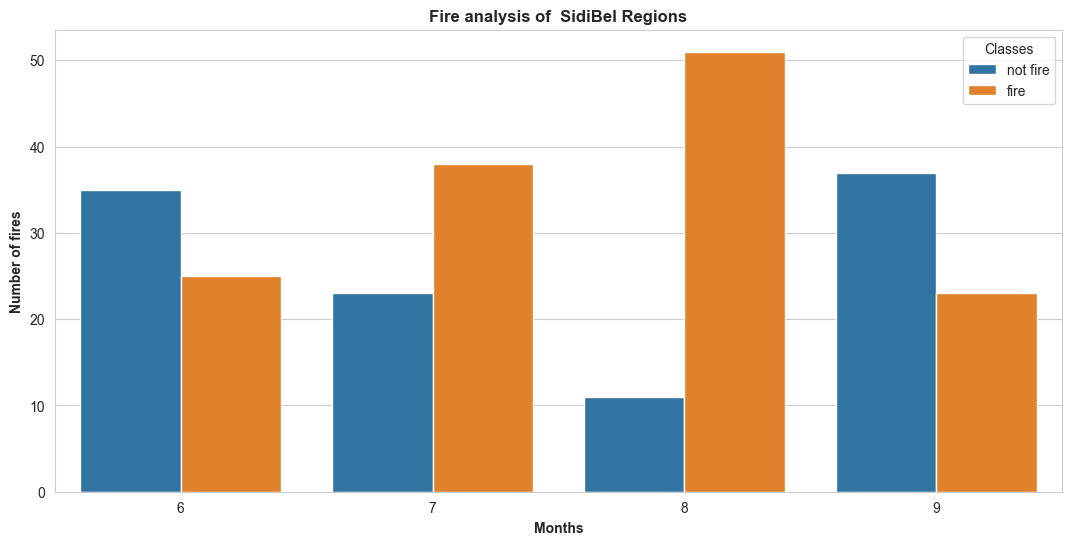

In [554]:
## Monthly fire analysis

df_temp = df.loc[df['Region'] == 1]
plt.subplots(figsize=(13, 6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data= df)
plt.xlabel('Months', weight='bold')
plt.ylabel('Number of fires', weight='bold')
plt.title("Fire analysis of  SidiBel Regions", weight='bold')

Text(0.5, 1.0, 'Fire analysis of  Bejaia Regions')

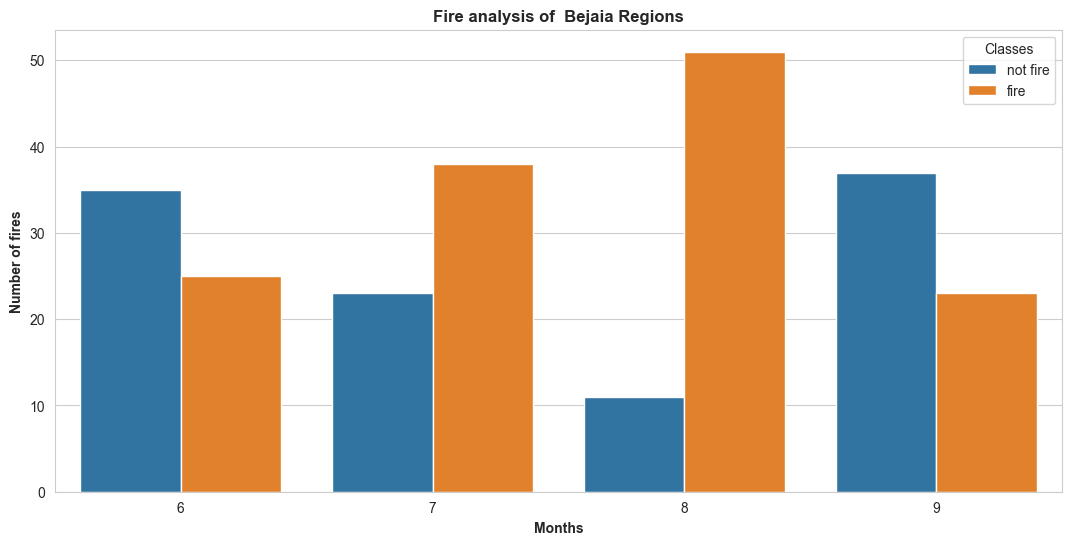

In [555]:
df_temp = df.loc[df['Region'] == 0]
plt.subplots(figsize=(13, 6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data= df)
plt.xlabel('Months', weight='bold')
plt.ylabel('Number of fires', weight='bold')
plt.title("Fire analysis of  Bejaia Regions", weight='bold')

It is observed that August and September had most forest fires for both regions. And from the above plot of months, we can understand few things.
    
Most of the fires occured in August and very high fires occured in June , July and August

Less fire was on september